# DSI Summary Research Program Initial Explore
by Qinlian Yang, Vanderbilt University

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

##  `1. Decision_tree`

In [2]:
apple_stock = pd.read_csv('apple_stock_prepared.csv')

In [3]:
apple_stock.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [4]:
X = apple_stock.loc[:, apple_stock.columns != 'close']
Y = apple_stock['close']

In [5]:
# 20% is the test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [6]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  156
Length Of test data  40
Length Of training Y  156
Length Of test data Y 40


In [7]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2):
    dtr = DecisionTreeRegressor(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    r2 = r2_score(Y_train, Y_train_pred)
    Y_test_pred = dtr.predict(X_test)
    r2_test = r2_score(Y_test, Y_test_pred)
    print("R Squared on train data: ", r2)
    print("R Squared on test data: ", r2_test)
    features = list(X.columns)
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, feature_names=features, filled=True)
    plt.show()

### Training with max depth 2

R Squared on train data:  0.9212766627116157
R Squared on test data:  0.8680317979644208


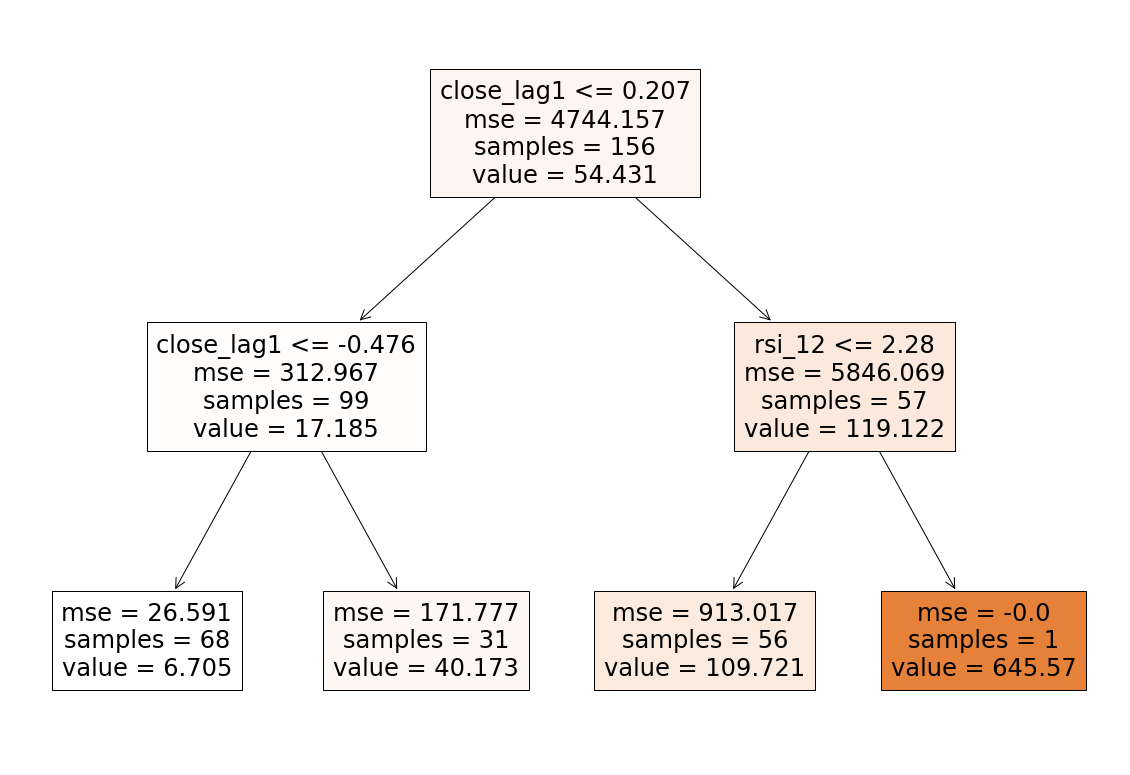

In [8]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2)

### Training with max depth 3

R Squared on train data:  0.9734446494183121
R Squared on test data:  0.8549438035490431


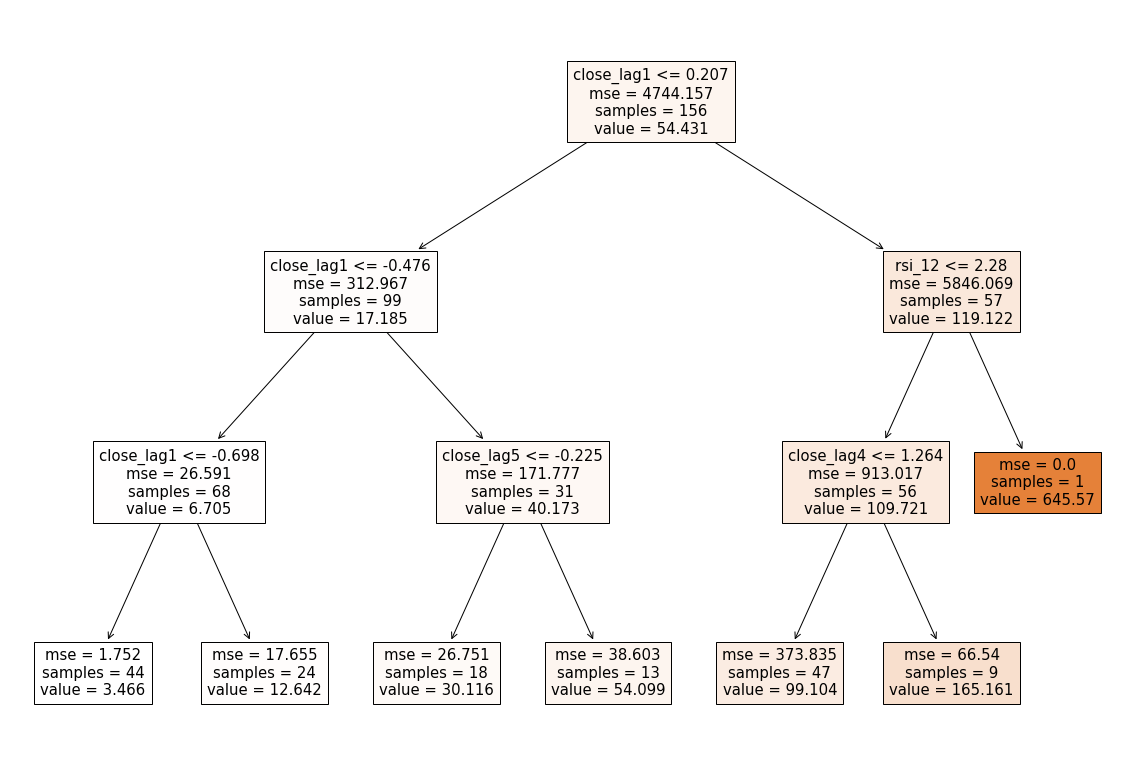

In [9]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 3)
# we are starting to overfit

### Training with max depth 4

R Squared on train data:  0.9916878853577327
R Squared on test data:  0.9223059357688016


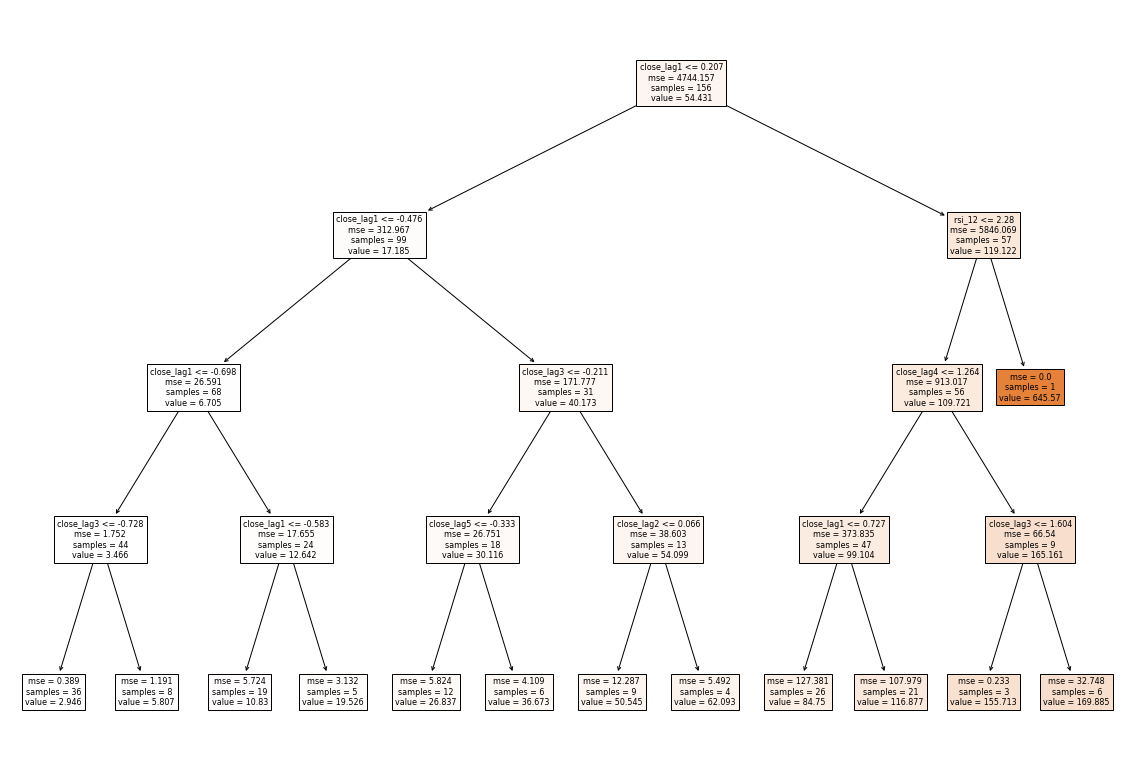

In [10]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 4)

##  `2. Random Forest`

### Random Forrest Regression For Stock Prediction

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rfr = RandomForestRegressor(random_state=100,oob_score=True,max_features='sqrt')

In [26]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True, random_state=100)

In [14]:
1 - rfr.oob_score_

0.41870693080119614

In [15]:
y_rfr_pred = rfr.predict(X_test)

In [16]:
print("Train r2 score", r2_score(Y_train, rfr.predict(X_train)))

Train r2 score 0.9263168701430624


In [17]:
print("Test r2 score", r2_score(Y_test, y_rfr_pred))

Test r2 score 0.9927000112307877


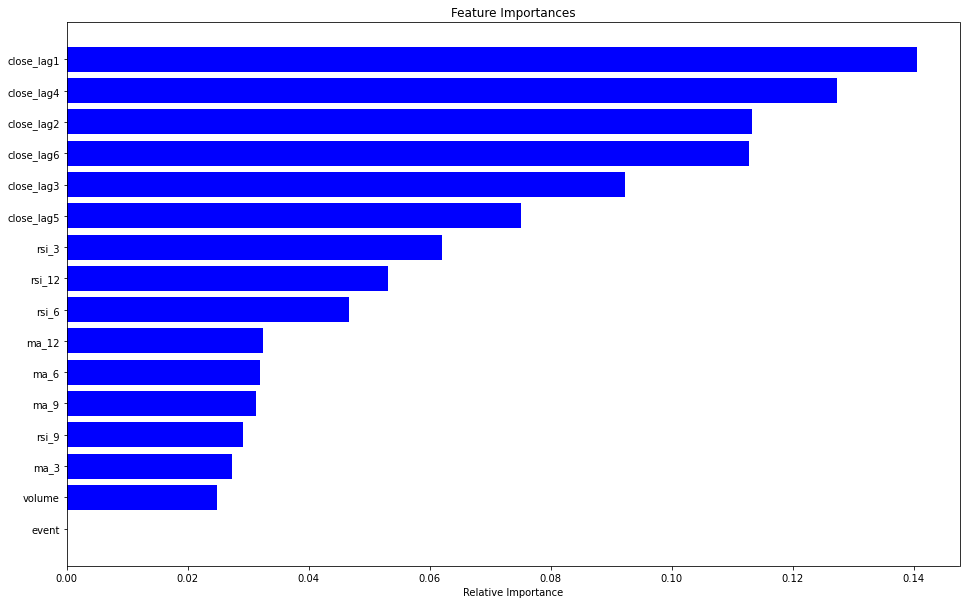

In [18]:
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(16,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##  `3. XGBoost Model`

In [19]:
from xgboost import XGBRegressor

In [20]:
xgr = XGBRegressor()

In [21]:
xgr.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_xgr_pred = xgr.predict(X_test)

In [23]:
print("Train r2 score", r2_score(Y_train, xgr.predict(X_train)))

Train r2 score 0.9999999998219432


In [24]:
print("Test r2 score", r2_score(Y_test, y_xgr_pred))

Test r2 score 0.9748136968755812
